In [1]:
from google.colab import drive
drive.mount('/content/drive')

GDRIVE_PATH = 'drive/My Drive/'

Mounted at /content/drive


### Import Libraries

In [2]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras import Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [4]:
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.8.2
/device:GPU:0
Num GPUs Available:  1


### Load Dataset

In [5]:
labels = ['pumpkin', 'tomato', 'watermelon']
img_size = 224

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_data(GDRIVE_PATH + 'vegetable/train')
val = get_data(GDRIVE_PATH + 'vegetable/validation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


### Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


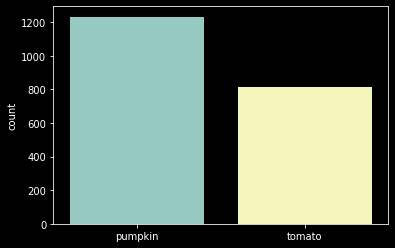

In [7]:
cls_plot = []
for i in train:
    if(i[1] == 0):
        cls_plot.append('pumpkin')
    elif (i[1] == 1):
        cls_plot.append('tomato')
    else:
        cls_plot.append("watermelon")

sns.countplot(cls_plot)

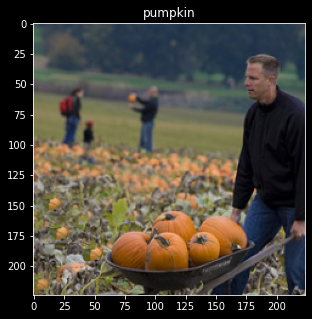

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

### Data Processing

In [9]:
train_images = []
train_labels = []
val_images = []
val_labels = []

for feature, label in train:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in val:
  val_images.append(feature)
  val_labels.append(label)

# Normalize the data
train_images = np.array(train_images) / 255
val_images = np.array(val_images) / 255

train_images.reshape(-1, img_size, img_size, 1)
train_labels = np.array(train_labels)

val_images.reshape(-1, img_size, img_size, 1)
val_labels = np.array(val_labels)

In [10]:
train_images.shape, train_labels.shape 

((2050, 224, 224, 3), (2050,))

In [11]:
val_images.shape, val_labels.shape 

((0,), (0,))

In [12]:
train_labels = keras.utils.to_categorical(train_labels, 3)
val_labels = keras.utils.to_categorical(val_labels, 3)

In [13]:
train_images.shape, train_labels.shape

((2050, 224, 224, 3), (2050, 3))

In [14]:
val_images.shape, val_labels.shape 

((0,), (0, 3))

### Building VGG Architecture

In [15]:
model = keras.Sequential()
weight_decay = 0.0005
model_input = (224, 224, 3)

model.add(Conv2D(64, (3, 3), padding='same', input_shape=model_input, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                        

In [17]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Training the model

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = GDRIVE_PATH + "checkpoints/model_vgg.h5"

checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, periode=5, mode='auto')

In [20]:
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=16, callbacks=[checkpoint])

Epoch 1/10
129/129 [==============================] - ETA: 0s - loss: 4.1741 - accuracy: 0.5673
Epoch 1: saving model to drive/My Drive/checkpoints/model_vgg.h5
129/129 [==============================] - 32s 248ms/step - loss: 4.1741 - accuracy: 0.5673
Epoch 2/10
128/129 [============================>.] - ETA: 0s - loss: 3.9445 - accuracy: 0.6763
Epoch 2: saving model to drive/My Drive/checkpoints/model_vgg.h5
129/129 [==============================] - 23s 178ms/step - loss: 3.9437 - accuracy: 0.6766
Epoch 3/10
128/129 [============================>.] - ETA: 0s - loss: 3.6194 - accuracy: 0.7549
Epoch 3: saving model to drive/My Drive/checkpoints/model_vgg.h5
129/129 [==============================] - 24s 183ms/step - loss: 3.6197 - accuracy: 0.7541
Epoch 4/10
128/129 [============================>.] - ETA: 0s - loss: 3.4812 - accuracy: 0.7261
Epoch 4: saving model to drive/My Drive/checkpoints/model_vgg.h5
129/129 [==============================] - 23s 182ms/step - loss: 3.4816 - accur

### Evaluation

Saving download.jpg to download (1).jpg
The image is classified as [1.6809103e-10 1.0000000e+00 3.0470144e-23]


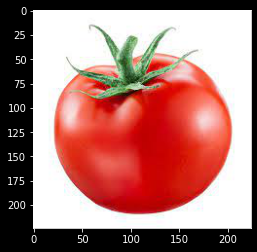

In [24]:
import keras
from keras_preprocessing import image
from google.colab import files
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Predicting Images
  path = fn
  img = keras.preprocessing.image.load_img(path, target_size=(224,224,3))
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  plt.imshow(img)
  img = np.expand_dims(img, axis = 0)
  predictions = model.predict(img)
  print("The image is classified as", predictions[0])
  # predicted_class = class_names[np.argmax(predictions[0])]
  # print("Prediction for the image below:", predicted_class)